# Regularization Demo
## Ridge, Lasso y Elastic Net

Los métodos de regularización son usados normalmente para reducir la dependencia de una variable independiente particular añadiendo una penalización a la función de coste (la que el algoritmo se encarga de minimizar), reduciendo así el temido *overfitting*. De este modo, se trata de evitar que los coeficientes de las variables independientes tomen valores extremos.

### 1. Cargamos librerías

In [492]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

### 2. Vemos qué pinta tiene el dataset

In [493]:
# Loading pre-defined Boston Dataset 
boston_dataset = datasets.load_boston() 
print(boston_dataset.DESCR) 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 3. Rápido análisis exploratorio para ver sus dependencias lineales

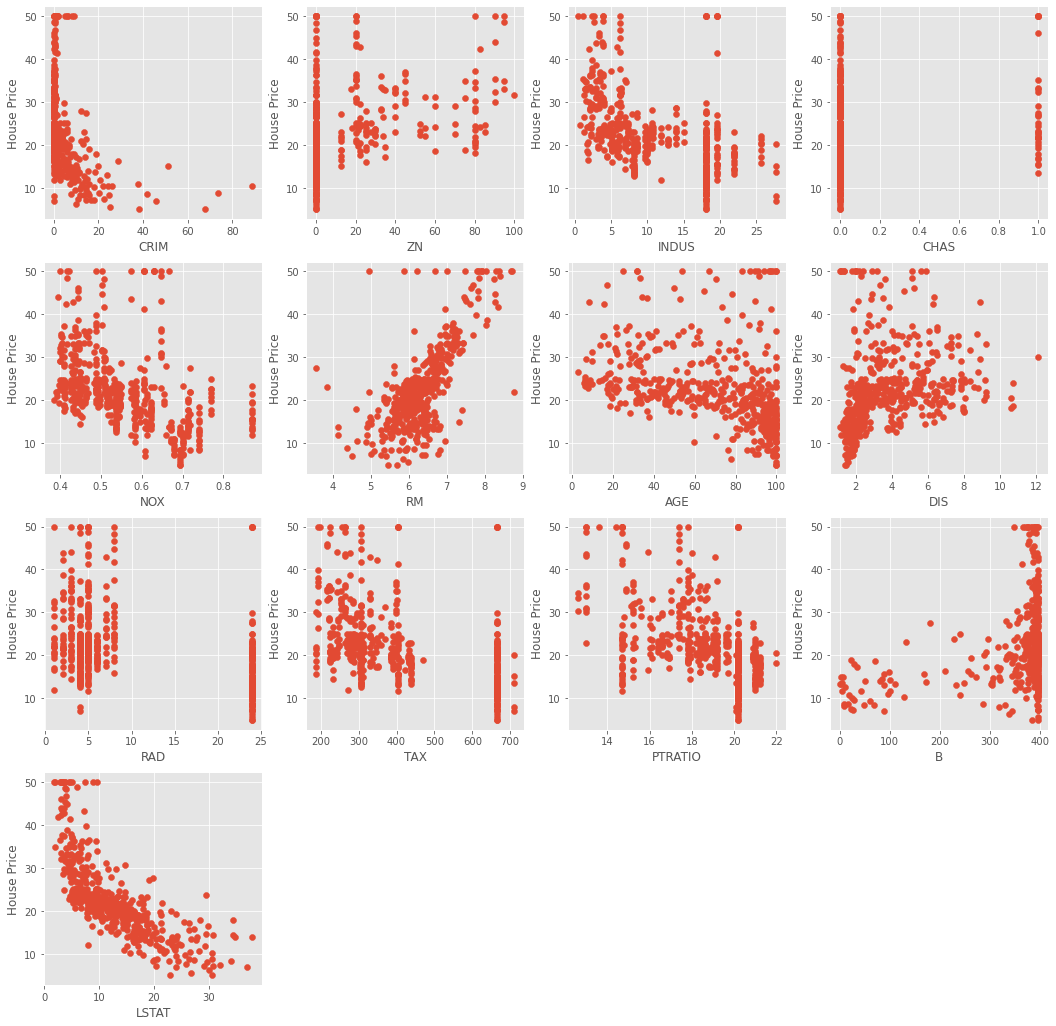

In [448]:
# Generate scatter plot of independent vs Dependent variable 
plt.style.use('ggplot') 
fig = plt.figure(figsize = (18, 18)) 
  
for index, feature_name in enumerate(boston_dataset.feature_names): 
    ax = fig.add_subplot(4, 4, index + 1) 
    ax.scatter(boston_dataset.data[:, index], boston_dataset.target) 
    ax.set_ylabel('House Price', size = 12) 
    ax.set_xlabel(feature_name, size = 12) 

plt.show() 

### 4. Preprocesado de los datos

In [480]:
# Load the dataset into Pandas Dataframe 
boston_pd = pd.DataFrame(boston_dataset.data) 
boston_pd.columns = boston_dataset.feature_names 
boston_pd_target = np.asarray(boston_dataset.target) 
boston_pd['House Price'] = pd.Series(boston_pd_target) 
  
# input  
X = boston_pd.iloc[:, :-1]

#output 
Y = boston_pd.iloc[:, -1] 
  
# print(boston_pd.head())

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)
  
print("Train data shape of X = % s and Y = % s : "%( 
    x_train.shape, y_train.shape)) 
  
print("Test data shape of X = % s and Y = % s : "%( 
    x_test.shape, y_test.shape)) 

Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


### 5. Regresión lineal múltiple

In [467]:
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 
  
# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test)

In [468]:
# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error)
mean_squared_error

Mean squared Error on test set :  22.098694827098488


22.098694827098488

In [469]:
# Putting together the coefficient and their corrsponding variable names  
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = x_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 

# Getting coefficients:
print(lreg_coefficient) 

    Columns  Coefficient Estimate
0      CRIM             -0.128323
1        ZN              0.029552
2     INDUS              0.048859
3      CHAS              2.773503
4       NOX            -16.238829
5        RM              4.368755
6       AGE             -0.009248
7       DIS             -1.400867
8       RAD              0.257761
9       TAX             -0.009957
10  PTRATIO             -0.923123
11        B              0.013185
12    LSTAT             -0.517640


In [470]:
lreg_y_pred = lreg.predict(x_train) 
mean_squared_error = np.mean((lreg_y_pred - y_train)**2) 
print("Mean squared Error on train set : ", mean_squared_error) 

Mean squared Error on train set :  22.340057992152882


In [471]:
print("Coeficientes:", lreg.coef_)
print("Interceptor:", lreg.intercept_)

Coeficientes: [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]
Interceptor: 29.836420163838405


Pintamos los coeficientes para verlos mejor

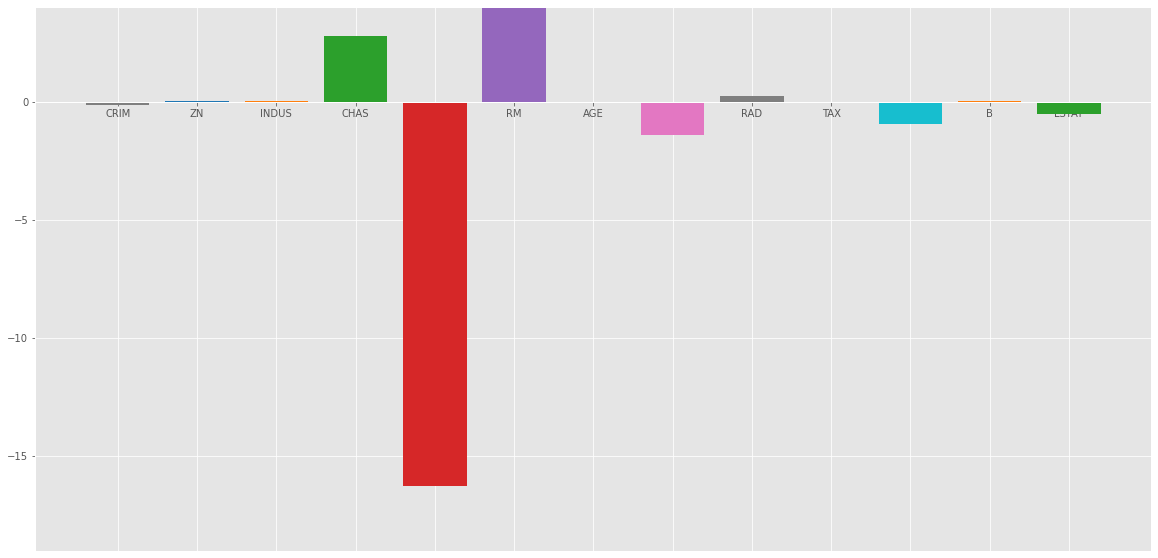

In [472]:
# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(lreg_coefficient["Columns"],  
lreg_coefficient['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
ax.set_ylim([-19,4])
  
plt.style.use('ggplot');

### 6. Ridge regression

La regresión Ridge añade a la función de coste una penalización de regularización L2, lo que reduce los valores de los coeficientes drásticamente. No llega a eliminar estos coeficientes completamente, pero sí que permite medir el impacto de diferentes variables independientes:

In [456]:
# Load the dataset into Pandas Dataframe 
boston_pd = pd.DataFrame(boston_dataset.data) 
boston_pd.columns = boston_dataset.feature_names 
boston_pd_target = np.asarray(boston_dataset.target) 
boston_pd['House Price'] = pd.Series(boston_pd_target) 
  
# input  
X = boston_pd.iloc[:, :-1] 
  
#output 
Y = boston_pd.iloc[:, -1] 
  
# print(boston_pd.head())

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)
  
print("Train data shape of X = % s and Y = % s : "%( 
    x_train.shape, y_train.shape)) 
  
print("Test data shape of X = % s and Y = % s : "%( 
    x_test.shape, y_test.shape)) 

Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


In [457]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge
  
# Train the model  
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test)
y_pred

array([28.54064867, 35.71551744, 14.42009815, 25.04814058, 19.20234452,
       22.35320449, 17.52750631, 14.17684204, 22.18499979, 20.76195907,
       24.06170559, 18.52148362, -7.18864146, 21.20513043, 19.19166506,
       26.13388324, 20.16549065,  5.54695316, 40.34571749, 17.91815854,
       27.5481662 , 29.93665643, 11.20500881, 24.57464556, 18.1888637 ,
       15.1181412 , 22.41851475, 14.46895295, 21.53062635, 19.48957221,
       21.83517015, 25.4260258 , 25.69271188, 18.78119269, 15.9756706 ,
       18.41368915, 31.18077354, 20.76445709, 23.26457957, 24.58355668,
       14.04176364, 31.91298129, 42.37339182, 17.16763115, 27.0516969 ,
       17.22846544, 13.96361484, 25.87064036, 19.83569122, 30.25881706,
       21.25169572, 34.1522766 , 16.00749082, 26.25113993, 39.76924876,
       22.72399595, 19.40186461, 32.77846975, 24.93946917, 12.66989306,
       23.1287835 , 30.99910855, 31.77003921, 16.43730279, 20.95565665,
       15.62086327, 20.58563733, 26.003086  , 30.88371223, 11.65

In [458]:
# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge)

22.480475501233865


In [459]:
# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 

    Columns  Coefficient Estimate
0      CRIM             -0.123830
1        ZN              0.031392
2     INDUS              0.017677
3      CHAS              2.542772
4       NOX             -8.772492
5        RM              4.379802
6       AGE             -0.015373
7       DIS             -1.290861
8       RAD              0.244068
9       TAX             -0.010824
10  PTRATIO             -0.833466
11        B              0.013486
12    LSTAT             -0.534354


In [460]:
print("Coeficientes:", ridgeR.coef_)
print("Interceptor:", ridgeR.intercept_)

Coeficientes: [-0.12383039  0.03139178  0.01767668  2.54277179 -8.77249222  4.37980204
 -0.01537349 -1.29086084  0.24406848 -0.01082435 -0.83346553  0.01348642
 -0.53435396]
Interceptor: 24.87837047296951


Veamos en la gráfica cómo quedaría para alpha = 1

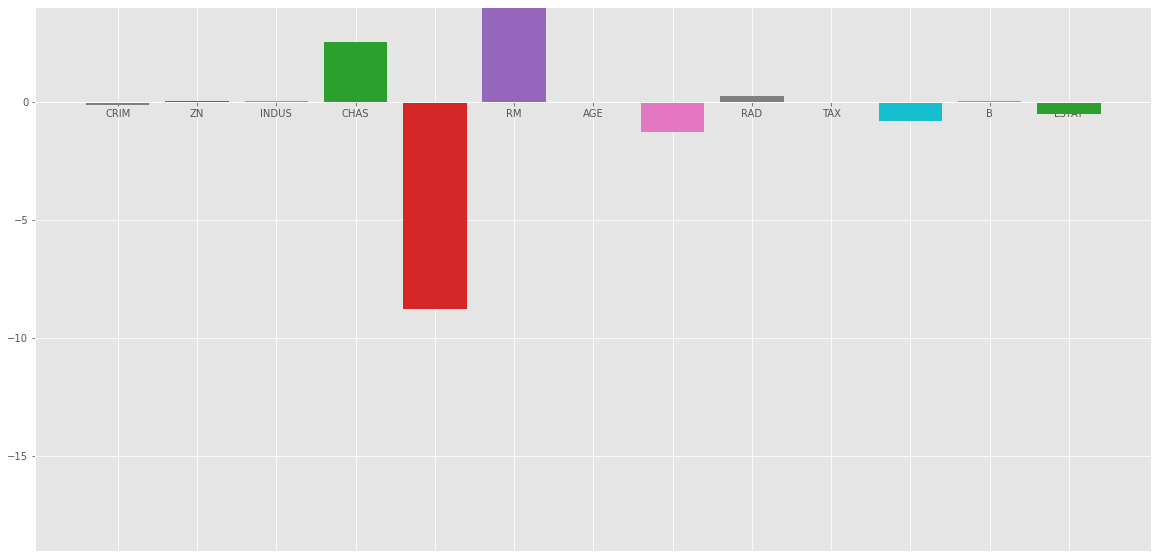

In [461]:
# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(ridge_coefficient["Columns"],  
ridge_coefficient['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
ax.set_ylim([-19,4])
  
plt.style.use('ggplot') 
plt.show() 

Si hacemos ahora alpha = 10

In [462]:
# Train the model  
ridgeR = Ridge(alpha = 100) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge)

22.727346304724755


    Columns  Coefficient Estimate
0      CRIM             -0.124096
1        ZN              0.038237
2     INDUS             -0.034836
3      CHAS              0.553359
4       NOX             -0.170648
5        RM              2.338971
6       AGE             -0.002521
7       DIS             -1.076123
8       RAD              0.290950
9       TAX             -0.013855
10  PTRATIO             -0.814406
11        B              0.012933
12    LSTAT             -0.700810


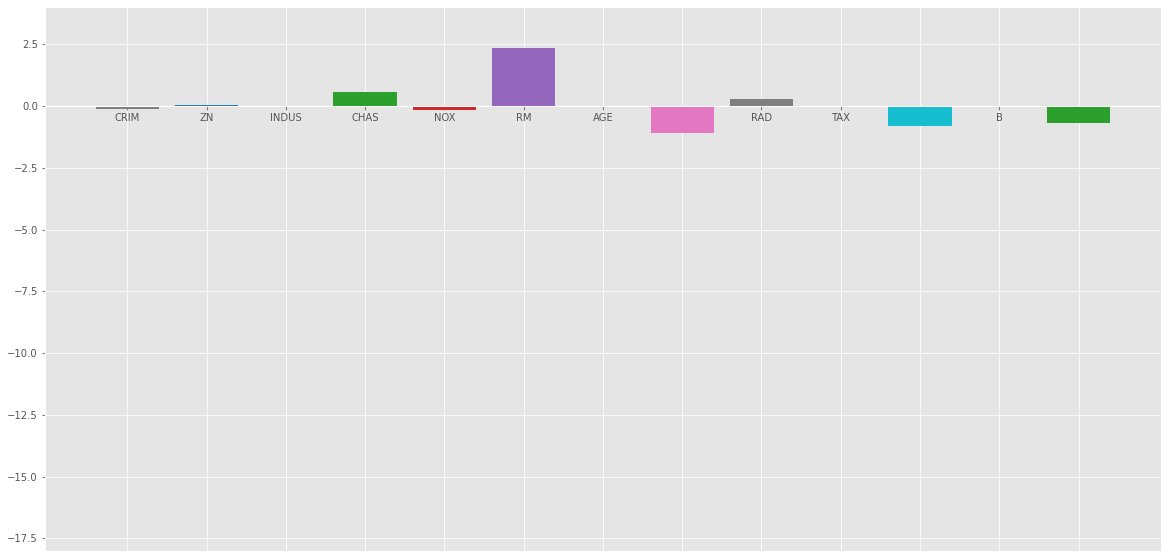

In [463]:
# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient)

# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(ridge_coefficient["Columns"],  
ridge_coefficient['Coefficient Estimate'], color = color) 
  
ax.spines['bottom'].set_position('zero') 
ax.set_ylim([-18,4])
  
plt.style.use('ggplot') 
plt.show() 

### 7. Lasso regression

La regresión Lasso utiliza una penalización de regularización L1, lo cual no es que reduzca el valor de los coeficientes como la regresión Ridge, sino que llega a eliminar aquellos que tienen un impacto menor (si lo tienen) en la predicción. Se usa en algunos casos como selector de variables (feature selection), que será un tema que veremos en el futuro con un poco más de detalle.

In [464]:
# Load the dataset into Pandas Dataframe 
boston_pd = pd.DataFrame(boston_dataset.data) 
boston_pd.columns = boston_dataset.feature_names 
boston_pd_target = np.asarray(boston_dataset.target) 
boston_pd['House Price'] = pd.Series(boston_pd_target) 

# input  
X = boston_pd.iloc[:, :-1] 
  
#output 
Y = boston_pd.iloc[:, -1] 
  
# print(boston_pd.head())

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)
  
print("Train data shape of X = % s and Y = % s : "%( 
    x_train.shape, y_train.shape)) 
  
print("Test data shape of X = % s and Y = % s : "%( 
    x_test.shape, y_test.shape)) 

Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


In [465]:
# import Lasso regression from sklearn library 
from sklearn.linear_model import Lasso 
  
# Train the model 
lasso = Lasso(alpha = .05)
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 
  
# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 

Mean squared error on test set 23.388257449139033


    Columns  Coefficient Estimate
0      CRIM             -0.117808
1        ZN              0.033302
2     INDUS             -0.011365
3      CHAS              1.759108
4       NOX             -0.000000
5        RM              4.344972
6       AGE             -0.020861
7       DIS             -1.134618
8       RAD              0.229039
9       TAX             -0.011977
10  PTRATIO             -0.729660
11        B              0.013879
12    LSTAT             -0.561074


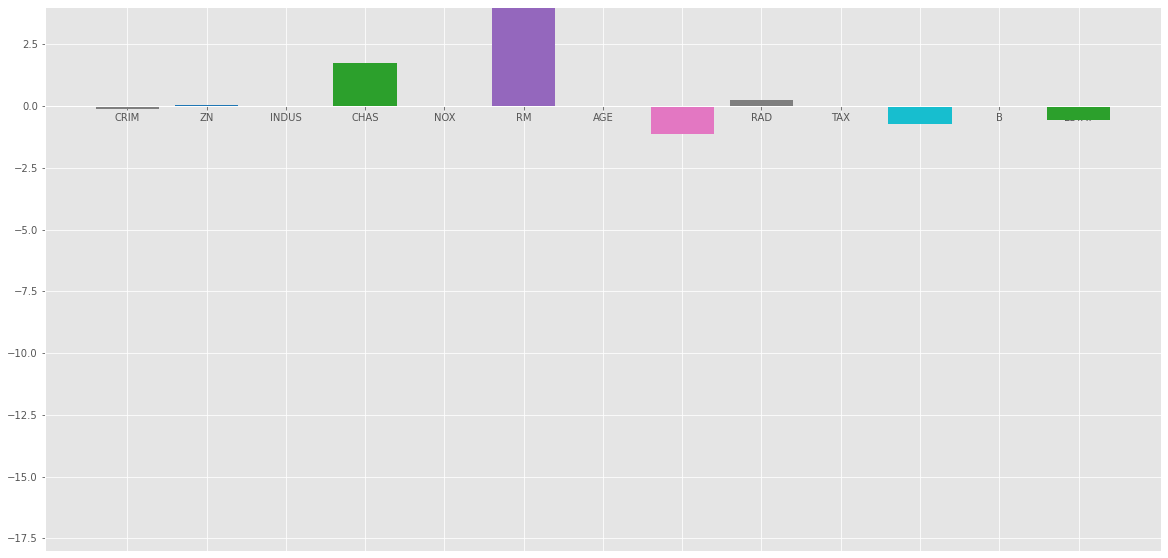

In [466]:
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
  
print(lasso_coeff) 

# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(lasso_coeff["Columns"],  
lasso_coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
ax.set_ylim([-18,4])
  
plt.style.use('ggplot')

Mean squared error on test set 23.388257449139033
    Columns  Coefficient Estimate
0      CRIM             -0.117808
1        ZN              0.033302
2     INDUS             -0.011365
3      CHAS              1.759108
4       NOX             -0.000000
5        RM              4.344972
6       AGE             -0.020861
7       DIS             -1.134618
8       RAD              0.229039
9       TAX             -0.011977
10  PTRATIO             -0.729660
11        B              0.013879
12    LSTAT             -0.561074


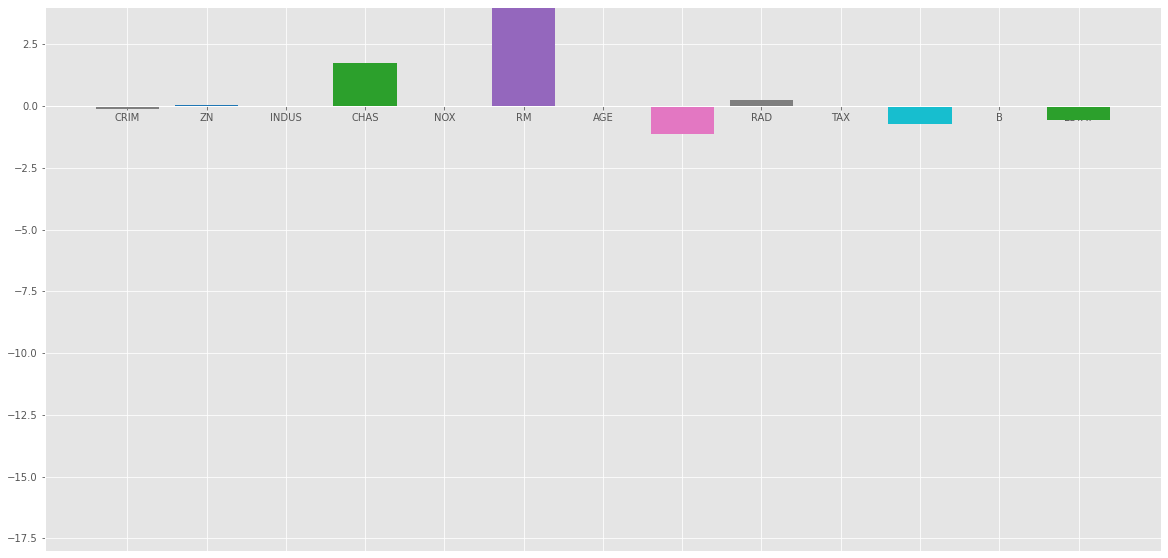

In [407]:
# import Lasso regression from sklearn library 
from sklearn.linear_model import Lasso 
  
# Train the model 
lasso = Lasso(alpha = 0.05) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 
  
# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
  
print(lasso_coeff) 

# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(lasso_coeff["Columns"],  
lasso_coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero')
ax.set_ylim([-18,4])
  
plt.style.use('ggplot')

In [408]:
X['NOX'].describe()

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64

### 8. Elastic Net

Elastic Net, por su parte, combina las 2 regularizaciones que hemos visto anteriormente: Ridge y Lasso. ¿Cómo lo hace? Pues añadiendo las dos penalizaciones que añaden cada una de ellas a su función de coste. En la mayoría de casos, gracias a esta combinación, funciona mejor que las ya mencionadas regresiones Ridge y Lasso:

In [409]:
# import model 
from sklearn.linear_model import ElasticNet 
  
# Train the model 
e_net = ElasticNet(l1_ratio=0.9) 
e_net.fit(x_train, y_train) 
  
# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 
  
e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

Mean Squared Error on test set 24.343817991716644


,Columns,Coefficient Estimate
0,CRIM,-0.087992
1,ZN,0.028729
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,1.378834
6,AGE,0.013873
7,DIS,-0.616030
8,RAD,0.222633
9,TAX,-0.011868


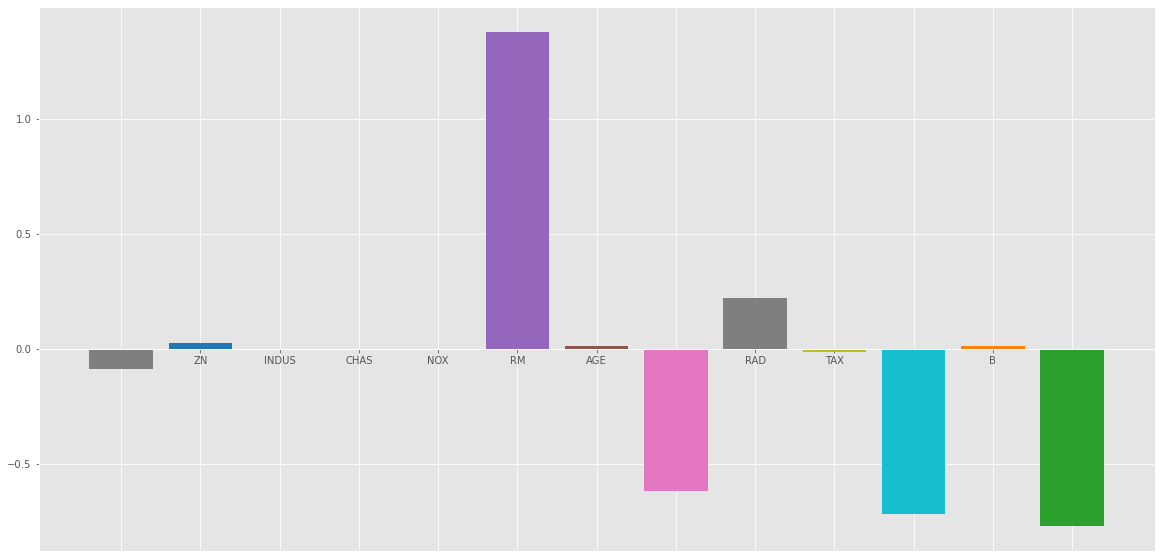

In [410]:
# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(e_net_coeff["Columns"],  
e_net_coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

<font color='red'>*¡Spoiler Alert!*</font>

Y para rematar... Tenemos la guinda del pastel. No lo veremos aún pero es una de las cosas divertidas que haremos en el futuro: ¡¡GridSearch!! O lo que es lo mismo, dejar que la máquine pruebe valores por nosotros de forma iterativa para obtener los mejores resultados:

In [496]:
np.linspace(0, 0.05, 50)

array([0.        , 0.00102041, 0.00204082, 0.00306122, 0.00408163,
       0.00510204, 0.00612245, 0.00714286, 0.00816327, 0.00918367,
       0.01020408, 0.01122449, 0.0122449 , 0.01326531, 0.01428571,
       0.01530612, 0.01632653, 0.01734694, 0.01836735, 0.01938776,
       0.02040816, 0.02142857, 0.02244898, 0.02346939, 0.0244898 ,
       0.0255102 , 0.02653061, 0.02755102, 0.02857143, 0.02959184,
       0.03061224, 0.03163265, 0.03265306, 0.03367347, 0.03469388,
       0.03571429, 0.03673469, 0.0377551 , 0.03877551, 0.03979592,
       0.04081633, 0.04183673, 0.04285714, 0.04387755, 0.04489796,
       0.04591837, 0.04693878, 0.04795918, 0.04897959, 0.05      ])

In [484]:
from sklearn.model_selection import GridSearchCV

# define model
model = ElasticNet()
# define grid
grid = dict()
grid['alpha'] = [1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.1)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
# perform the search
results = search.fit(x_train, y_train)

# summarize
print('MSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MSE: -24.368
Config: {'alpha': 0.0001, 'l1_ratio': 0.4}


In [491]:
-results.best_score_

24.36761985104392

### EJERCICIO

1. Lee el dataframe de los futbolistas e intenta predecir el 'value_eur' con un algoritmo lineal
2. Ahora prueba con los 3 métodos que acabamos de ver, ¿con cuál obtienes mejor resultado? ¿Qué variables has utilizado? ¿Has convertido alguna categórica? Compara tus resultados con tus compañeros de clase.

EXTRA: ¿Recuerdas algún ejercicio donde hayas utilizado un regresor lineal y hayas tenido problemas de overfitting? Prueba a utilizar alguno de estos métodos y comprueba el resultado.

In [411]:
df = pd.read_csv("../../../data/FIFA20.csv")
df

,short_name,long_name,dob,club,overall,potential,value_eur,wage_eur,team_position,preferred_foot,influencer
0,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,FC Barcelona,94,94,95500000,565000,RW,Left,True
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,Juventus,93,93,58500000,405000,LW,Right,True
2,Neymar Jr,Neymar da Silva Santos Junior,1992-02-05,Paris Saint-Germain,92,92,105500000,290000,CAM,Right,True
3,J. Oblak,Jan Oblak,1993-01-07,Atlético Madrid,91,93,77500000,125000,GK,Right,False
4,E. Hazard,Eden Hazard,1991-01-07,Real Madrid,91,91,90000000,470000,LW,Right,True
...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,邵帅,1997-03-10,Beijing Renhe FC,48,56,40000,2000,RES,Right,False
18274,Xiao Mingjie,Mingjie Xiao,1997-01-01,Shanghai SIPG FC,48,56,40000,2000,SUB,Right,False
18275,Zhang Wei,张威,2000-05-16,Hebei China Fortune FC,48,56,40000,1000,SUB,Right,False
18276,Wang Haijian,汪海健,2000-08-02,Shanghai Greenland Shenhua FC,48,54,40000,1000,SUB,Right,False


In [412]:
df = pd.read_csv("../../../data/FIFA20.csv")
df['year'] = df['dob'].apply(lambda x: x[:4]).astype(int)
df['month'] = df['dob'].apply(lambda x: x[5:7]).astype(int)
df['day'] = df['dob'].apply(lambda x: x[8:]).astype(int)
# df['position_aux'] = df['team_position'].apply(lambda x: agrupa(x))
df['position_aux'] = df['team_position']\
    .apply(lambda x: 
           'Delantero' if x == 'CF' else (
               'Extremo' if (x == 'LW' or x == 'RW') else (
                   'Suplente' if x == 'SUB' else (
                       'Reserva' if x == 'RES' else 'Otros'))))
df

,short_name,long_name,dob,club,overall,potential,value_eur,wage_eur,team_position,preferred_foot,influencer,year,month,day,position_aux
0,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,FC Barcelona,94,94,95500000,565000,RW,Left,True,1987,6,24,Extremo
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,Juventus,93,93,58500000,405000,LW,Right,True,1985,2,5,Extremo
2,Neymar Jr,Neymar da Silva Santos Junior,1992-02-05,Paris Saint-Germain,92,92,105500000,290000,CAM,Right,True,1992,2,5,Otros
3,J. Oblak,Jan Oblak,1993-01-07,Atlético Madrid,91,93,77500000,125000,GK,Right,False,1993,1,7,Otros
4,E. Hazard,Eden Hazard,1991-01-07,Real Madrid,91,91,90000000,470000,LW,Right,True,1991,1,7,Extremo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,邵帅,1997-03-10,Beijing Renhe FC,48,56,40000,2000,RES,Right,False,1997,3,10,Reserva
18274,Xiao Mingjie,Mingjie Xiao,1997-01-01,Shanghai SIPG FC,48,56,40000,2000,SUB,Right,False,1997,1,1,Suplente
18275,Zhang Wei,张威,2000-05-16,Hebei China Fortune FC,48,56,40000,1000,SUB,Right,False,2000,5,16,Suplente
18276,Wang Haijian,汪海健,2000-08-02,Shanghai Greenland Shenhua FC,48,54,40000,1000,SUB,Right,False,2000,8,2,Suplente


In [413]:
position_dummies = pd.get_dummies(df['position_aux'], prefix='pos')
position_dummies
df = df.join(position_dummies)

In [414]:
['year', 'overall', 'potencial', 'wage_eur'] + list(position_dummies.columns)

['year',
 'overall',
 'potencial',
 'wage_eur',
 'pos_Delantero',
 'pos_Extremo',
 'pos_Otros',
 'pos_Reserva',
 'pos_Suplente']

In [415]:
X = df.copy()[['year', 'month', 'day', 'overall', 'potential', 'wage_eur'] + list(position_dummies.columns)]
Y = df['value_eur']

In [416]:
modelo_lineal = LinearRegression()

In [417]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

In [418]:
modelo_lineal.fit(x_train, y_train)

LinearRegression()

In [419]:
modelo_lineal.score(x_train, y_train)

0.7927601055351889

In [420]:
modelo_lineal.score(x_test, y_test)

0.7909538907071397

In [477]:
import statsmodels.formula.api as sm

In [478]:
f"""Q('{y_train.name}')~{'+'.join(["Q('"+col+"')" for col in x_train.columns])}"""

"Q('House Price')~Q('CRIM')+Q('ZN')+Q('INDUS')+Q('CHAS')+Q('NOX')+Q('RM')+Q('AGE')+Q('DIS')+Q('RAD')+Q('TAX')+Q('PTRATIO')+Q('B')+Q('LSTAT')"

In [481]:
model = sm.ols(formula=f"""Q('{y_train.name}')~{'+'.join(["Q('"+col+"')" for col in x_train.columns])}""", data = boston_pd).fit()

In [482]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Q('House Price')   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 05 Feb 2021   Prob (F-statistic):          6.72e-135
Time:                        18:07:19   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.4595      5.103      7.144      0.000      26.432      46.487
Q('CRIM')       -0.1080      0.033     -3.287      0.001      -0.173      -0.043
Q('ZN')          0.0464      0.014      3.382      0.001       0.019       0.073
Q('INDUS')       0.0206      0.061      0.334      0.738      -0.100       0.141
Q('CHAS')        2.6867      0.862      3.118      0.002       0.994       4.380
Q('NOX')       -17.7666      3.820     -4.651      0.000     -25.272     -10.262
Q('RM')          3.8099      0.418      9.116      0.000       2.989       4.631
Q('AGE')         0.0007      0.013      0.052      0.958      -0.025       0.027
Q('DIS')        -1.4756      0.199     -7.398      0.000      -1.867      -1.084
Q('RAD')         0.3060      0.066      4.613      0.000       0.176       0.436
Q('TAX')        -0.0123      0.004     -3.280      0.001      -0.020      -0.005
Q('PTRATIO')    -0.9527      0.131     -7.283      0.000      -1.210      -0.696
Q('B')           0.0093      0.003      3.467      0.001       0.004       0.015
Q('LSTAT')      -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Mean squared error on test set 6515476165406.354
          Columns  Coefficient Estimate
0            year          2.088005e+05
1           month          3.601835e+04
2             day         -2.460891e+02
3         overall          2.311514e+05
4       potential          8.139218e+02
5        wage_eur          1.895200e+02
6   pos_Delantero          2.280752e+06
7     pos_Extremo          1.335998e+06
8       pos_Otros          4.366448e+05
9     pos_Reserva         -7.540642e+04
10   pos_Suplente         -3.351761e+04


C:\Users\TheBridge\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1409851372414960.0, tolerance: 42775703485740.266
  model = cd_fast.enet_coordinate_descent(


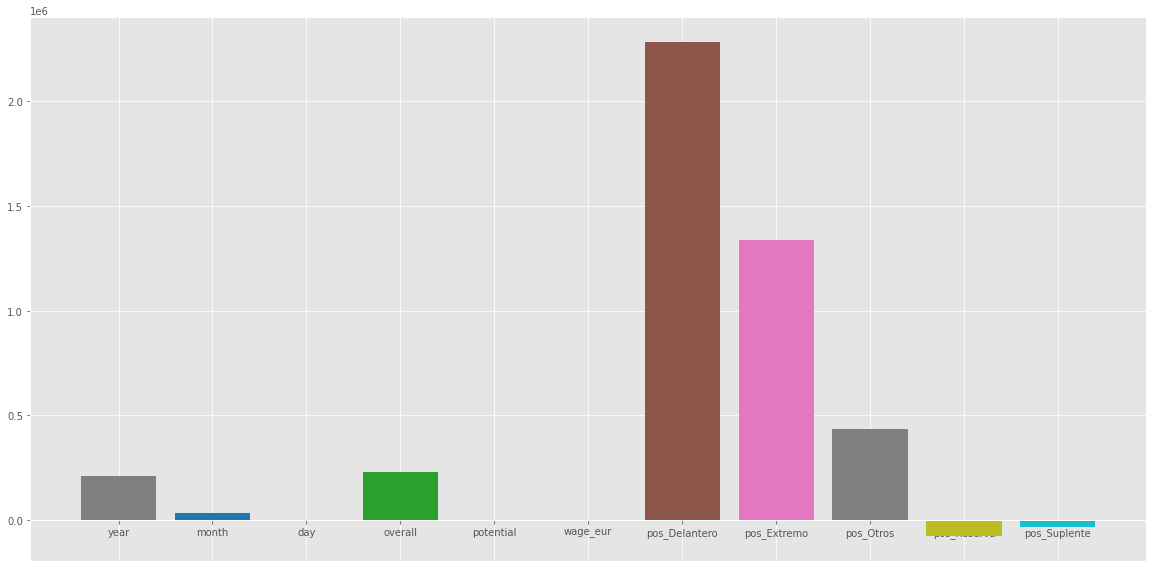

In [370]:
# import Lasso regression from sklearn library 
from sklearn.linear_model import Lasso 
  
# Train the model 
lasso = Lasso(alpha = 1, random_state=42, max_iter=10000) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 
  
# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
  
print(lasso_coeff) 

# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(lasso_coeff["Columns"],  
lasso_coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero')
  
plt.style.use('ggplot')

In [428]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# elastic = ElasticNet(alpha=0.05, l1_ratio=0.9)

# elastic.fit(x_train_scaled, y_train)

C:\Users\TheBridge\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2655658918654240.0, tolerance: 42775703485740.266
  model = cd_fast.enet_coordinate_descent(


Mean squared error on test set 6515492917531.86
          Columns  Coefficient Estimate
0            year          9.755004e+05
1           month          1.239829e+05
2             day         -2.195862e+03
3         overall          1.612783e+06
4       potential          4.996288e+03
5        wage_eur          3.971238e+06
6   pos_Delantero          5.588338e+04
7     pos_Extremo          1.815488e+05
8       pos_Otros          2.285404e+05
9     pos_Reserva         -1.615091e+04
10   pos_Suplente         -9.939451e+02


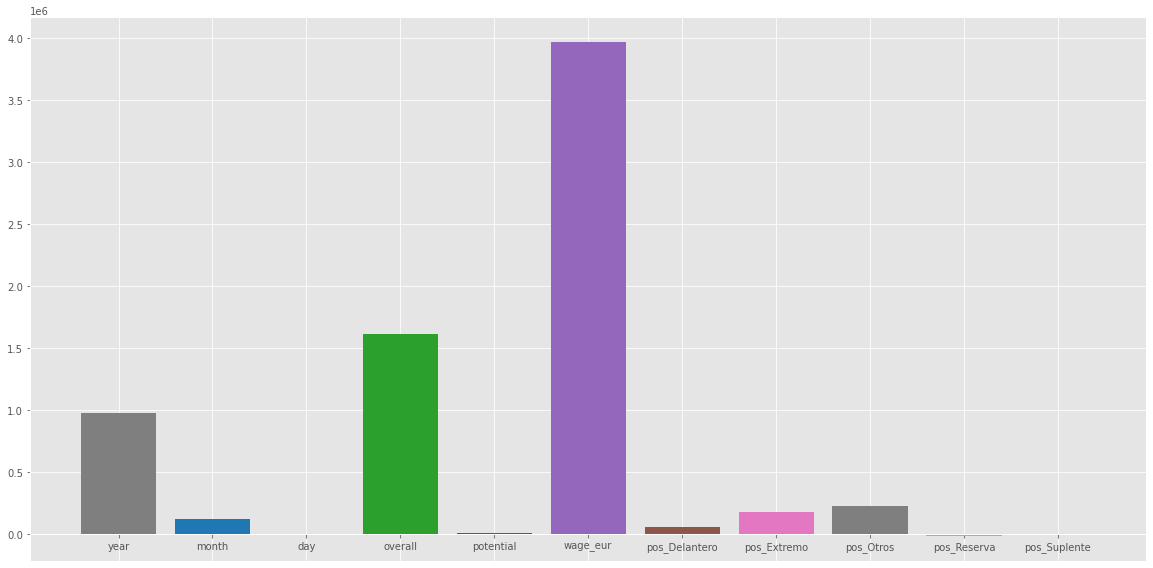

In [430]:
# import Lasso regression from sklearn library 
from sklearn.linear_model import Lasso 
  
# Train the model 
lasso = Lasso(alpha = 1, random_state=42, max_iter=100) 
lasso.fit(x_train_scaled, y_train) 
y_pred1 = lasso.predict(x_test_scaled) 
  
# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test2)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train2.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
  
print(lasso_coeff) 

# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(lasso_coeff["Columns"],  
lasso_coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero')
  
plt.style.use('ggplot')

In [440]:
y_predictions = pd.DataFrame(y_test).copy()
y_predictions['pred'] = y_pred1
y_predictions = y_predictions.sort_values(by='value_eur')

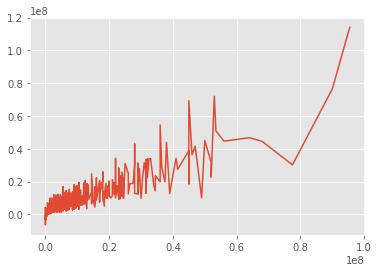

In [443]:
plt.plot(y_predictions['value_eur'], y_predictions['pred'])

In [428]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

# x_train_scaled = scaler.transform(x_train)
# x_test_scaled = scaler.transform(x_test)

# elastic = ElasticNet(alpha=0.05, l1_ratio=0.9)

# elastic.fit(x_train_scaled, y_train)

<ipython-input-444-9f0226d7ed42>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(x_train, y_train)
C:\Users\TheBridge\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\TheBridge\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432416138021491e+16, tolerance: 42775703485740.266
  model = cd_fast.enet_coordinate_descent(


Mean squared error on test set 6515493663967.497
          Columns  Coefficient Estimate
0            year          2.088003e+05
1           month          3.601835e+04
2             day         -2.460910e+02
3         overall          2.311508e+05
4       potential          8.142515e+02
5        wage_eur          1.895199e+02
6   pos_Delantero          2.313933e+06
7     pos_Extremo          1.367519e+06
8       pos_Otros          4.681138e+05
9     pos_Reserva         -4.394987e+04
10   pos_Suplente         -2.053586e+03


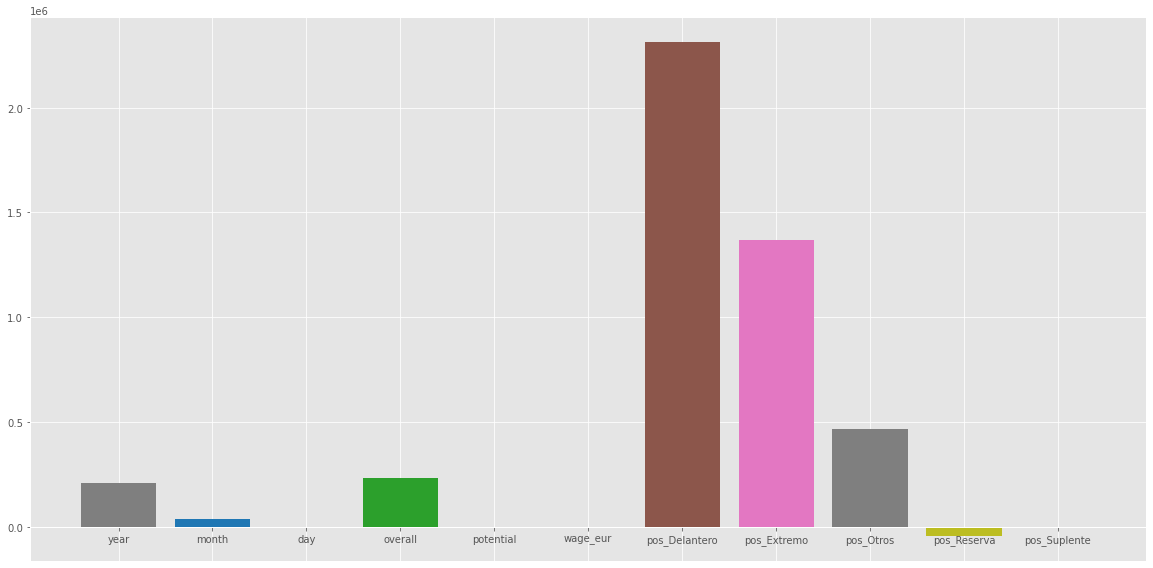

In [444]:
# import Lasso regression from sklearn library 
from sklearn.linear_model import Lasso 
  
# Train the model 
lasso = Lasso(alpha = 0, random_state=42, max_iter=100) 
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test) 
  
# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test2)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
  
print(lasso_coeff) 

# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(lasso_coeff["Columns"],  
lasso_coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero')
  
plt.style.use('ggplot')